In [1]:
!git clone https://github.com/sohelrana-aiub/Pro

fatal: destination path 'Pro' already exists and is not an empty directory.


In [2]:
cd Pro

/content/Pro


In [3]:
ls

best_model.json  Fish.csv  main.py   prediction.py  requirements.txt
classes.npy      LICENSE   model.py  README.md


In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/content/Pro/Fish.csv")

In [6]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [7]:
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [8]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

**Data Pre-processing**

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [10]:
#create a columns tranformer
ct = make_column_transformer(
    (MinMaxScaler(),['Length1','Length2','Length3']), #turn all values from 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["Species"])
)
#create X and y values
X =   data.drop("Weight",axis=1)
y = data['Weight']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1234)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((111, 6), (48, 6), (111,), (48,))

In [11]:
#fit the column transformer to our data
ct.fit(x_train)
X_train_normal = ct.transform(x_train)
X_test_normal = ct.transform(x_test)

In [12]:
X_train_normal.shape

(111, 10)

In [13]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

#1.build a mode
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(100),
                         #           tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(50),
                            #        tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(10),
#                                                              tf.keras.layers.Dropout(0.5),

                                    tf.keras.layers.Dense(1)
            ])
#2. compile a model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss=tf.keras.losses.mae,
              metrics=["mae","mse"])
#3.fit a model
history = model.fit(X_train_normal,y_train,epochs=1000,callbacks=[callback])

Epoch 1/1000
4/4 [==============================] - 3s 13ms/step - loss: 407.2036 - mae: 407.2036 - mse: 297773.4375
Epoch 2/1000
4/4 [==============================] - 0s 19ms/step - loss: 406.4711 - mae: 406.4711 - mse: 297027.0000
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 405.6867 - mae: 405.6867 - mse: 296302.8438
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 404.7419 - mae: 404.7419 - mse: 295335.0938
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 403.6306 - mae: 403.6306 - mse: 294279.6250
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 402.2663 - mae: 402.2663 - mse: 293015.5625
Epoch 7/1000
4/4 [==============================] - 0s 8ms/step - loss: 400.5511 - mae: 400.5511 - mse: 291394.4375
Epoch 8/1000
4/4 [==============================] - 0s 8ms/step - loss: 398.3777 - mae: 398.3777 - mse: 289280.3750
Epoch 9/1000
4/4 [==============================] - 0s 8ms/step - l

In [14]:
#evaluation
model.evaluate(X_test_normal,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 84.8235 - mae: 84.8235 - mse: 11702.7295


[84.82351684570312, 84.82351684570312, 11702.7294921875]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,671
Trainable params: 6,671
Non-trainable params: 0
_________________________________________________________________


In [16]:
pred = model.predict(X_test_normal)

2/2 [==============================] - 0s 8ms/step


In [17]:
len(X_test_normal)

48

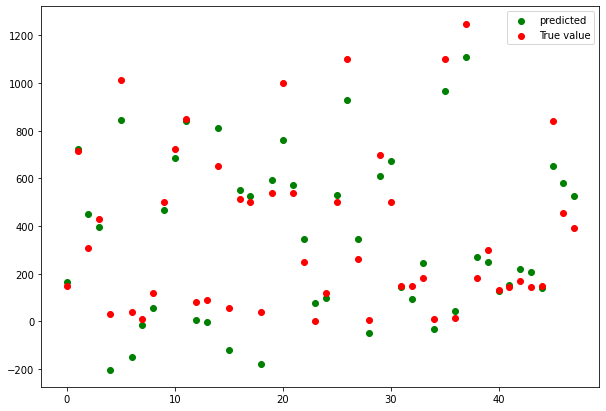

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.scatter(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()
plt.show()